In [2]:
# Imports for analyzing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [14]:
# Set seed for reproducibility
np.random.seed(42)
rng = np.random.default_rng() # create random number Generator

# Number of subjects
n_subjects = 15

# Data parameters
meas_var = 0.3

# Define the levels of factors A and B
levels_A = ['Normal', 'Bold', 'Bold-Italic']

A_effect = np.array([2, 5, 6]) # defines the effect
print(A_effect)
sbj_effect = rng.random(n_subjects) # variation across subjects
meas = np.outer(sbj_effect,A_effect) + rng.standard_normal(size=(n_subjects,len(levels_A)))*meas_var
meas = meas.clip(min=0) # make the minimum value = 0

# Generate random data
data = {
    'subject': np.repeat(np.arange(n_subjects), len(levels_A)),
    'factor': np.tile(levels_A, n_subjects),
    'words': np.reshape(meas,n_subjects*len(levels_A))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Randomly shift the values for each subject so there are clear differences between them

print(df)


[2 5 6]
    subject       factor     words
0         0       Normal  0.410190
1         0         Bold  0.195837
2         0  Bold-Italic  0.391928
3         1       Normal  2.004111
4         1         Bold  4.437334
5         1  Bold-Italic  5.305611
6         2       Normal  1.545652
7         2         Bold  3.769720
8         2  Bold-Italic  5.066695
9         3       Normal  1.030255
10        3         Bold  2.023890
11        3  Bold-Italic  2.346192
12        4       Normal  0.795046
13        4         Bold  3.182886
14        4  Bold-Italic  3.280507
15        5       Normal  0.248501
16        5         Bold  1.430905
17        5  Bold-Italic  1.966928
18        6       Normal  1.397596
19        6         Bold  3.589645
20        6  Bold-Italic  3.805300
21        7       Normal  0.820723
22        7         Bold  1.185403
23        7  Bold-Italic  1.040923
24        8       Normal  0.518108
25        8         Bold  1.407870
26        8  Bold-Italic  2.124785
27        9 

c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zsxbo\Projects\stats-visualizations\.conda\Lib\site-packages\seab

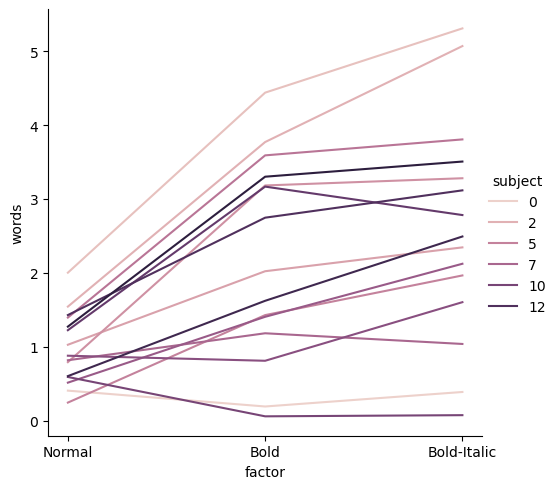

In [19]:
# Plotting
g = sns.relplot(df, x="factor", y="words", hue="subject", kind="line")
g.savefig('../fig/rmANOVA_example.png')